In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('noncompliant_customer_review_dataset.tsv', sep='\t', encoding='utf-8',error_bad_lines=False,index_col=False)

Skipping line 4793: expected 10 fields, saw 11
Skipping line 5508: expected 10 fields, saw 11
Skipping line 6086: expected 10 fields, saw 11
Skipping line 7489: expected 10 fields, saw 11
Skipping line 8084: expected 10 fields, saw 11
Skipping line 9580: expected 10 fields, saw 11



In [3]:
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [4]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

In [5]:
df['REVIEW_TEXT'] = preprocess(df['REVIEW_TEXT'])

In [6]:
from textblob import TextBlob
df['polarity'] = df['REVIEW_TEXT'].map(lambda text: TextBlob(text).sentiment.polarity)

In [7]:
df_biased = df[df.LABEL == '__label1__']

In [8]:
df_Unbiased=df[df.LABEL == '__label2__']

In [9]:
df_biased

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,polarity
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",-0.300000
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,0.219226
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,0.347143
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,-0.088542
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,0.145833
5,6,__label1__,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,I'm not sure what this is supposed to be but I...,0.020833
6,7,__label1__,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,Pleased with ping pong table. 11 year old and ...,0.300000
7,8,__label1__,4,Y,Beauty,B00QUL8VX6,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,Great vitamin C serum... I really like the oil...,0.230000
8,9,__label1__,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,I've used tide pods laundry detergent for many...,0.440000
9,10,__label1__,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,Everybody wants to fall for their promises. Bu...,0.006250


In [10]:
df_Unbiased

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,polarity
10406,10501,__label2__,5,Y,Office Products,B005VCNRA2,SafeT Sleeves RFID Protectors (Total of 8 Slee...,Fits fine inside a money belt,I purchased this product to separate my credit...,0.372222
10407,10502,__label2__,5,N,Toys,B00ICAKJJW,Power Wheels Nickelodeon Teenage Mutant Ninja ...,Great fun for little ones. But be sure you ful...,This is probably one of the most exciting gift...,0.237645
10408,10503,__label2__,5,N,Toys,B0007OTPS2,Ty Beanie Babies Rescue - FDNY Dalmatian Dog,Rescuing Rescue,"I lost my stuffed Rescue toy, and was clearly ...",0.359375
10409,10504,__label2__,5,Y,Home Improvement,B008X099V0,Mr. Beams MB982 Wireless Battery Operated Indo...,"Battery operated, indoor or outdoor lights.","I LOVE these lights! Well, maybe that's too st...",0.451190
10410,10505,__label2__,5,Y,Tools,B0010O748Q,SE FS374 All-Weather Emergency 2-IN-1 Fire Sta...,Strike up the band! Great quality and quick s...,I ordered four more of these to go in my survi...,0.266667
10411,10506,__label2__,5,Y,Luggage,B005FKVSS8,"Rockland Luggage 17 Inch Rolling Backpack, Pin...",LOVE THIS !,I'm in nursing school and quickly realized if ...,0.174074
10412,10507,__label2__,5,N,Health & Personal Care,B000GCLR8Q,"Similasan Irritated Eye Relief Drops, .33-Ounc...",I love these eye drops,I live in the desert and have allergies. My ey...,0.119481
10413,10508,__label2__,4,N,Wireless,B00TSUVMBE,Speck Products MightyShell + FACEPLATE Case fo...,"solid slim case, drains wallet",I've owned several Speck cases for various pho...,0.021866
10414,10509,__label2__,5,Y,Tools,B002E1AUOE,Streamlight 76160 PolyStinger LED Flashlight w...,Great flashlight when you need it!,Great to store in the car. Never know when you...,0.283333
10415,10510,__label2__,5,Y,Automotive,B001DZFZPG,Slime 70005 Safety Spair 7-Minute Flat Tire Re...,Very Nice kit,I bought this Slime 70005 Safety Spair Tire Re...,0.366667


In [15]:
df_biased['polarity'].head()

0   -0.300000
1    0.219226
2    0.347143
3   -0.088542
4    0.145833
Name: polarity, dtype: float64

In [16]:
df_Unbiased['polarity'].head()

10406    0.372222
10407    0.237645
10408    0.359375
10409    0.451190
10410    0.266667
Name: polarity, dtype: float64

Text(0.5,1,'Sentiment Polarity Distribution-Biased')

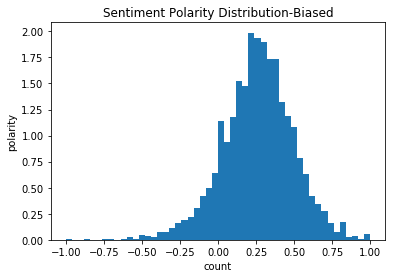

In [17]:
plt.hist(df_biased['polarity'], normed=True,bins=50)
plt.xlabel('count')
plt.ylabel('polarity')
plt.title('Sentiment Polarity Distribution-Biased')

Text(0.5,1,'Sentiment Polarity Distribution-Unbiased')

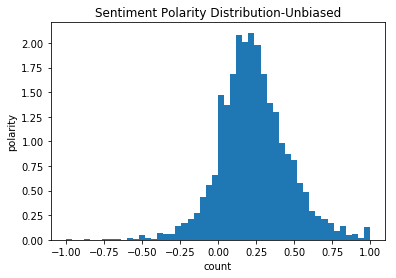

In [18]:
plt.hist(df_Unbiased['polarity'], normed=True,bins=50)
plt.xlabel('count')
plt.ylabel('polarity')
plt.title('Sentiment Polarity Distribution-Unbiased')

Text(0.5,1,'Customer rating distribution')

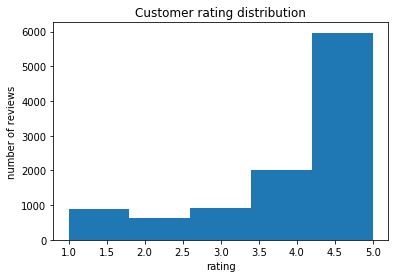

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.hist(df_biased['RATING'],bins=5)
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Customer rating distribution')

Text(0.5,1,'Customer rating distribution')

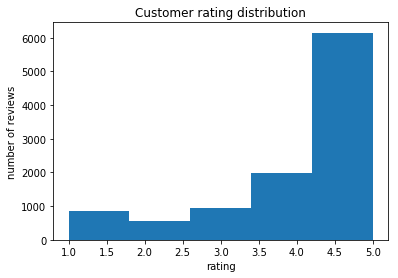

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.hist(df_Unbiased['RATING'],bins=5)
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Customer rating distribution')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


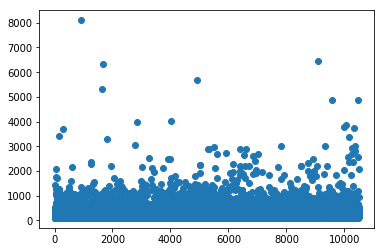

In [21]:
df_biased['review_len'] = df_biased['REVIEW_TEXT'].apply(len)
df_biased['review_len'].head()
plt.scatter(df_biased['DOC_ID'],df_biased['review_len'])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


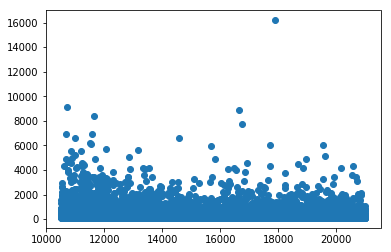

In [22]:
df_Unbiased['review_len'] = df_Unbiased['REVIEW_TEXT'].apply(len)
df_Unbiased['review_len'].head()
plt.scatter(df_Unbiased['DOC_ID'],df_Unbiased['review_len'])

In [29]:
df['word_count'] = df['REVIEW_TEXT'].apply(lambda x: len(x.split()))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


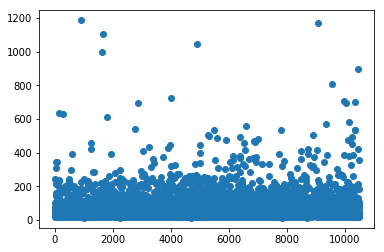

In [23]:
df_biased['word_count'] = df_biased['REVIEW_TEXT'].apply(lambda x: len(x.split()))
df_biased['word_count']
plt.scatter(df_biased['DOC_ID'],df_biased['word_count'])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


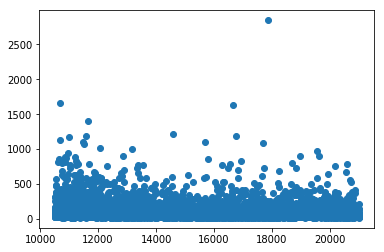

In [24]:
df_Unbiased['word_count'] = df_Unbiased['REVIEW_TEXT'].apply(lambda x: len(x.split()))
df_Unbiased['word_count']
plt.scatter(df_Unbiased['DOC_ID'],df_Unbiased['word_count'])

In [30]:
# from sklearn.preprocessing import LabelEncoder 
  
# le = LabelEncoder()
# df_Unbiased['VERIFIED_PURCHASE']= le.fit_transform(df_Unbiased['VERIFIED_PURCHASE'])
# df_Unbiased['VERIFIED_PURCHASE'=='Y']
# df_biased['VERIFIED_PURCHASE'].head()
# mapping = {"Y": 1, "N": 0}
# df_biased['VERIFIED_PURCHASE'] = df_biased['VERIFIED_PURCHASE'].map(mapping)
# df_biased['VERIFIED_PURCHASE'] = df_Unbiased['VERIFIED_PURCHASE'].fillna(0)
# df_biased['VERIFIED_PURCHASE'].head()
diag_map = {'N':1, 'Y':0}
df_biased['VERIFIED_PURCHASE'] = df_biased['VERIFIED_PURCHASE'].map(diag_map)
df_biased['VERIFIED_PURCHASE']
df['VERIFIED_PURCHASE'] = df['VERIFIED_PURCHASE'].map(diag_map)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [ ]:
from textblob import TextBlob

blob = TextBlob("I have a lovely bunch of coconuts.")
for word, pos in blob.tags:
    print word, pos

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_biased["REVIEW_TEXT"])

In [40]:
print(df['polarity'].size)
print(df['word_count'].size)
print(df['VERIFIED_PURCHASE'].size)
print(df['LABEL'].size)

20906
20906
20906
20906


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.model_selection import train_test_split

feature_cols=['polarity','word_count','VERIFIED_PURCHASE']
X=df[feature_cols]
y=df.LABEL

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# model = LogisticRegression()
# model.fit(X, y)
# predicted_classes = model.predict(X)
# accuracy = accuracy_score(y.flatten(),predicted_classes)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)

In [49]:
accuracy

0.7899368662712837

In [50]:
from sklearn.svm import SVC
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
predicted_SVM=clf_SVM.predict(X_test)

In [56]:
accuracy_SVM = accuracy_score(y_test,predicted_SVM)

In [57]:
accuracy_SVM

0.7929978955423761

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
predicted_knn=neigh.predict(X_test)

In [60]:
accuracy_SVM = accuracy_score(y_test,predicted_knn)
accuracy_SVM

0.7375167400038263

In [62]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [64]:
clf_MLP.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
predicted_MLP=clf_MLP.predict(X_test)

In [66]:
accuracy_MLP = accuracy_score(y_test,predicted_MLP)
accuracy_MLP

0.5043045724124737